In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import os
import math
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [3]:
#取得trainData
data_path = '//home/jovyan/project/action_data/Hand/'
trainSet = pd.DataFrame([])
# images 的路徑
path_list = os.listdir(data_path)
path_list = sorted(path_list)
for path in path_list:
    fp = []
    try:        
        sub_dirs = os.listdir(data_path + path + '/')
        sub_dirs = sorted(sub_dirs)
        for sdir in sub_dirs:
            fp.append(data_path + path + '/' + sdir + '/')
    except NotADirectoryError:
        pass
    trainSet = pd.concat([trainSet, pd.DataFrame({'subdir_path':fp, 'class':path})], ignore_index=True)

In [3]:
#取得validationData
data_path = '//home/jovyan/at073-group50/dataset/20bn_jester/validation/'
testSet = pd.DataFrame([])
# images 的路徑
path_list = os.listdir(data_path)
path_list = sorted(path_list)
for path in path_list:
    fp = []
    try:        
        sub_dirs = os.listdir(data_path + path + '/')
        sub_dirs = sorted(sub_dirs)
        for sdir in sub_dirs:
            fp.append(data_path + path + '/' + sdir + '/')
    except NotADirectoryError:
        pass
    testSet = pd.concat([testSet, pd.DataFrame({'subdir_path':fp, 'class':path})], ignore_index=True)

In [4]:
#定義目標類別
class_file = '//home/jovyan/at073-group50/dataset/20bn_jester/classes.csv'
with open(class_file) as f:
    classes = f.readlines()
classes = [c.strip() for c in classes]
num_classes = len(classes)

for i in range(num_classes):
    trainSet['class'][trainSet['class'] == classes[i]] = i
    testSet['class'][testSet['class'] == classes[i]] = i

In [5]:
print('Train Shape:', trainSet.shape, 'Test Shape:', testSet.shape)

(1300, 2)


//home/jovyan/project/action_data/Hand/UpDown/Aerial-L-L-UpDown/1.jpg
(960, 540, 3)


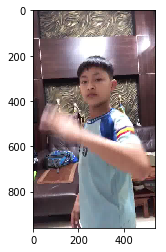

//home/jovyan/project/action_data/Hand/UpDown/Aerial-L-L-UpDown/10.jpg
(960, 540, 3)


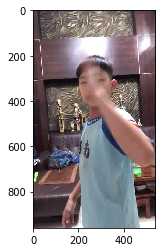

//home/jovyan/project/action_data/Hand/UpDown/Aerial-L-L-UpDown/11.jpg
(960, 540, 3)


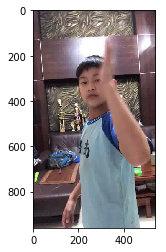

//home/jovyan/project/action_data/Hand/UpDown/Aerial-L-L-UpDown/12.jpg
(960, 540, 3)


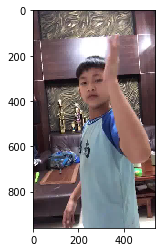

//home/jovyan/project/action_data/Hand/UpDown/Aerial-L-L-UpDown/13.jpg
(960, 540, 3)


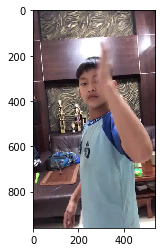

//home/jovyan/project/action_data/Hand/UpDown/Aerial-L-L-UpDown/14.jpg
(960, 540, 3)


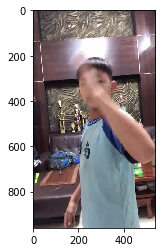

In [4]:
file_list = sorted(os.listdir(trainSet['subdir_path'][0]))
i = 0
for f in file_list:
    if (f.find('.jpg') < 0):
        continue
    print(trainSet['subdir_path'][0] + f)
    img = cv2.imread(trainSet['subdir_path'][0] + f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(img.shape)
    plt.imshow(img)
    plt.show()
    i += 1
    if i > 5: break

//home/jovyan/at073-group50/dataset/20bn_jester/validation/Doing other things/100090/00001.jpg
(100, 176, 3)


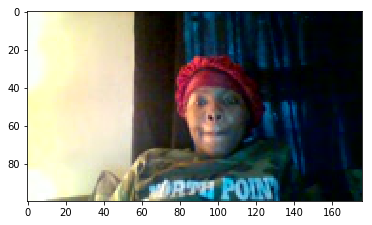

//home/jovyan/at073-group50/dataset/20bn_jester/validation/Doing other things/100090/00002.jpg
(100, 176, 3)


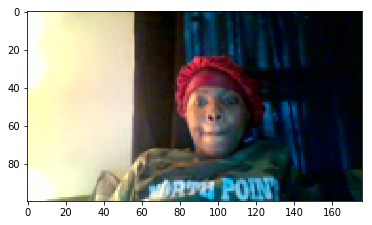

//home/jovyan/at073-group50/dataset/20bn_jester/validation/Doing other things/100090/00003.jpg
(100, 176, 3)


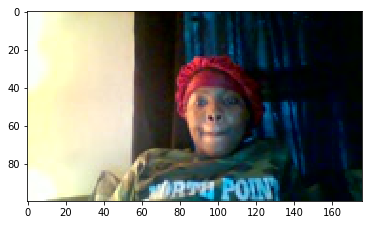

//home/jovyan/at073-group50/dataset/20bn_jester/validation/Doing other things/100090/00004.jpg
(100, 176, 3)


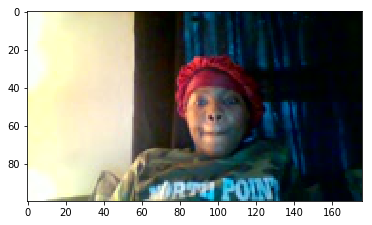

//home/jovyan/at073-group50/dataset/20bn_jester/validation/Doing other things/100090/00005.jpg
(100, 176, 3)


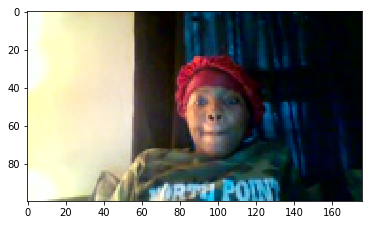

//home/jovyan/at073-group50/dataset/20bn_jester/validation/Doing other things/100090/00006.jpg
(100, 176, 3)


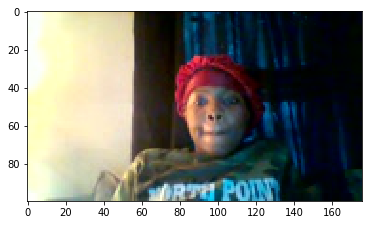

In [7]:
file_list = sorted(os.listdir(testSet['subdir_path'][0]))
i = 0
for f in file_list:
    if (f.find('.jpg') < 0):
        continue    
    print(testSet['subdir_path'][0] + f)
    img = cv2.imread(testSet['subdir_path'][0] + f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(img.shape)
    plt.imshow(img)
    plt.show()
    i += 1
    if i > 5: break

In [19]:
def CountFrameNums(dir_paths, num_frames):
    total = 0
    for d in dir_paths:
        files = os.listdir(d)
        subC = 0
        for f in files:
            if f.find('.jpg') >= 0:
                subC+=1
        total += subC - num_frames + 1
    return total